**Phases of this project**:

*   Prepare Elonmusk dataset 
*   Resizing images
*   Convert images to RGB
*   Get the numpyarray of RGB images






#1.Install libraries

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git    #install if you want to use google_images_download
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd google-images-download && sudo python setup.py install

In [ ]:
!pip install bing-image-downloader #in this project we use that

#2.Import libraries

##GPU

#Don't run this cell 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

##tensorflow libraries

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4032979342295533940
 xla_global_id: -1]

##connect to googledrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Elon/

/content/drive/MyDrive/Elon


In [ ]:
ls

'Copy of Image_1.jpg'   Elon1/


##necessary libraries in this project

In [ ]:
#from bing_image_downloader import downloader
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

#3.Download Elon mask dataset

In [ ]:
downloader.download("Elon Musk", limit=100,  output_dir='Elon1', 
                    adult_filter_off=True, force_replace=False, timeout=60)

##Read image and get shape of that





[[[162 127  84]
  [163 128  85]
  [163 128  85]
  ...
  [167 130  86]
  [167 130  86]
  [167 130  86]]

 [[162 127  84]
  [163 128  85]
  [163 128  85]
  ...
  [167 130  86]
  [167 130  86]
  [167 130  86]]

 [[162 127  84]
  [163 128  85]
  [163 128  85]
  ...
  [167 130  86]
  [167 130  86]
  [167 130  86]]

 ...

 [[181 168 152]
  [182 169 153]
  [182 169 153]
  ...
  [176 160 137]
  [177 161 138]
  [177 161 138]]

 [[181 168 152]
  [182 169 153]
  [183 170 154]
  ...
  [176 160 137]
  [176 160 137]
  [177 161 138]]

 [[180 167 151]
  [182 169 153]
  [183 170 154]
  ...
  [176 161 135]
  [177 162 136]
  [177 162 136]]]


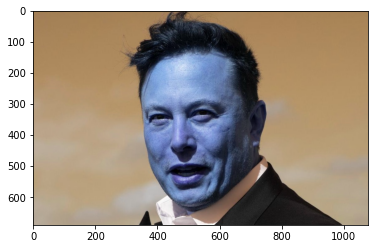

pixels [[[ 84 127 162]
  [ 85 128 163]
  [ 85 128 163]
  ...
  [ 86 130 167]
  [ 86 130 167]
  [ 86 130 167]]

 [[ 84 127 162]
  [ 85 128 163]
  [ 85 128 163]
  ...
  [ 86 130 167]
  [ 86 130 167]
  [ 86 130 167]]

 [[ 84 127 162]
  [ 85 128 163]
  [ 85 128 163]
  ...
  [ 86 130 167]
  [ 86 130 167]
  [ 86 130 167]]

 ...

 [[152 168 181]
  [153 169 182]
  [153 169 182]
  ...
  [137 160 176]
  [138 161 177]
  [138 161 177]]

 [[152 168 181]
  [153 169 182]
  [154 170 183]
  ...
  [137 160 176]
  [137 160 176]
  [138 161 177]]

 [[151 167 180]
  [153 169 182]
  [154 170 183]
  ...
  [135 161 176]
  [136 162 177]
  [136 162 177]]]


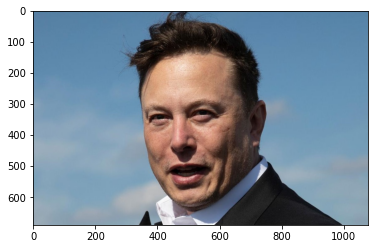

In [ ]:
img = cv2.imread("Copy of Image_1.jpg")
print(img)
plt.imshow(img)
plt.show()
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

[[[162 127  84]
  [163 128  85]
  [163 128  85]
  ...
  [167 130  86]
  [167 130  86]
  [167 130  86]]

 [[162 127  84]
  [163 128  85]
  [163 128  85]
  ...
  [167 130  86]
  [167 130  86]
  [167 130  86]]

 [[162 127  84]
  [163 128  85]
  [163 128  85]
  ...
  [167 130  86]
  [167 130  86]
  [167 130  86]]

 ...

 [[181 168 152]
  [182 169 153]
  [182 169 153]
  ...
  [176 160 137]
  [177 161 138]
  [177 161 138]]

 [[181 168 152]
  [182 169 153]
  [183 170 154]
  ...
  [176 160 137]
  [176 160 137]
  [177 161 138]]

 [[180 167 151]
  [182 169 153]
  [183 170 154]
  ...
  [176 161 135]
  [177 162 136]
  [177 162 136]]]
Image Width is 1078
Image Height is 689
pixels [[[ 84 127 162]
  [ 85 128 163]
  [ 85 128 163]
  ...
  [ 86 130 167]
  [ 86 130 167]
  [ 86 130 167]]

 [[ 84 127 162]
  [ 85 128 163]
  [ 85 128 163]
  ...
  [ 86 130 167]
  [ 86 130 167]
  [ 86 130 167]]

 [[ 84 127 162]
  [ 85 128 163]
  [ 85 128 163]
  ...
  [ 86 130 167]
  [ 86 130 167]
  [ 86 130 167]]

 ...

 [[15

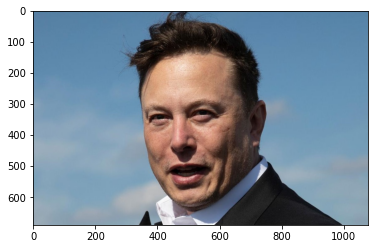

In [ ]:
img = cv2.imread("Copy of Image_1.jpg")
print(img)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Image Width is',img.shape[1])
print('Image Height is',img.shape[0])
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

#4.Resizing images 
##4.1 Resizing using OpenCV

Image Width is 250
Image Height is 250
pixels [[[211 208 219]
  [211 207 220]
  [212 209 220]
  ...
  [ 21  51 119]
  [ 25  50 117]
  [ 27  52 119]]

 [[211 208 219]
  [211 208 219]
  [212 209 220]
  ...
  [ 20  52 121]
  [ 23  51 119]
  [ 31  51 121]]

 [[211 208 217]
  [211 208 218]
  [213 210 220]
  ...
  [ 27  52 125]
  [ 25  52 123]
  [ 30  53 124]]

 ...

 [[ 26  34  74]
  [ 25  35  74]
  [ 23  36  73]
  ...
  [  8  18  61]
  [  3  16  55]
  [  3  11  48]]

 [[ 25  34  70]
  [ 26  35  74]
  [ 23  35  73]
  ...
  [  6  18  57]
  [  2  15  52]
  [  1  10  47]]

 [[ 24  32  69]
  [ 22  34  72]
  [ 22  34  73]
  ...
  [  3  18  56]
  [  1  13  51]
  [  2   8  42]]]


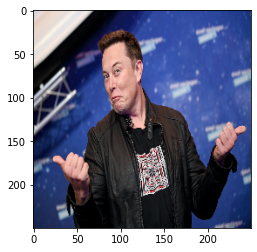

In [ ]:
resized_img = cv2.resize(img, (250,250))       # resize image by specifying custom width and height
print('Image Width is',resized_img.shape[1])
print('Image Height is',resized_img.shape[0])
image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

##4.2 Crop images using OpenCV

Cropped Image Dimensions : (250, 250, 3)
pixels [[[  7  11  46]
  [  8  12  50]
  [ 10  10  46]
  ...
  [ 51  75 163]
  [ 51  75 163]
  [ 53  74 163]]

 [[  8  12  49]
  [  7  13  45]
  [  9  11  52]
  ...
  [ 50  74 162]
  [ 52  76 164]
  [ 53  73 162]]

 [[  7  11  48]
  [  6  10  48]
  [  4  12  49]
  ...
  [ 51  75 163]
  [ 51  72 161]
  [ 51  71 160]]

 ...

 [[ 45  71 155]
  [ 47  72 154]
  [ 47  72 152]
  ...
  [156  96  85]
  [148  89  73]
  [147  88  72]]

 [[ 50  73 153]
  [ 48  73 157]
  [ 47  74 153]
  ...
  [152  96  81]
  [147  90  73]
  [147  86  68]]

 [[ 46  71 155]
  [ 47  72 154]
  [ 45  72 151]
  ...
  [159 101  87]
  [151  92  76]
  [149  90  74]]]


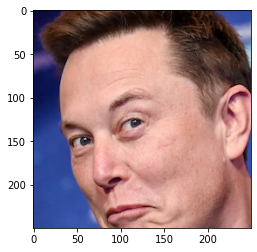

In [ ]:
cropped_image = img[100:350, 350:600]     # image[startY:endY, startX:endX]
cv2.imwrite('cropped-image-opencv.jpg', cropped_image)
print(f"Cropped Image Dimensions : {cropped_image.shape}") # 2732x3640
image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

#5.convert images to RGB

In [ ]:
image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

#6.Get numpy array of RGB image and show image

pixels [[[  7  11  46]
  [  8  12  50]
  [ 10  10  46]
  ...
  [ 51  75 163]
  [ 51  75 163]
  [ 53  74 163]]

 [[  8  12  49]
  [  7  13  45]
  [  9  11  52]
  ...
  [ 50  74 162]
  [ 52  76 164]
  [ 53  73 162]]

 [[  7  11  48]
  [  6  10  48]
  [  4  12  49]
  ...
  [ 51  75 163]
  [ 51  72 161]
  [ 51  71 160]]

 ...

 [[ 45  71 155]
  [ 47  72 154]
  [ 47  72 152]
  ...
  [156  96  85]
  [148  89  73]
  [147  88  72]]

 [[ 50  73 153]
  [ 48  73 157]
  [ 47  74 153]
  ...
  [152  96  81]
  [147  90  73]
  [147  86  68]]

 [[ 46  71 155]
  [ 47  72 154]
  [ 45  72 151]
  ...
  [159 101  87]
  [151  92  76]
  [149  90  74]]]


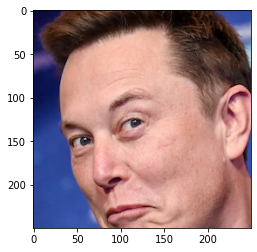

In [ ]:
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()
#plt.imsave('resizeimg22.jpg', pixels)